In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()
tf.disable_v2_behavior()
from tensorflow.keras.layers import Embedding, Dense
from keras.layers import Embedding, Dense, LSTM, Dropout,Bidirectional
from keras.models import Sequential
import math 
from sklearn.metrics import mean_squared_error
import tensorflow.experimental.numpy as tnp

ModuleNotFoundError: No module named 'tensorflow.tsl'

In [11]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [12]:
from general_utils import get_paths
path = get_paths()
path['temp_data']

'/home/dalit/RnD/results/temp_data'

### Example of appending different shaped-arrays to higher leveled array using padding of the with the maximal length

In [13]:
#An example of 4 samples (trainX)

samples=([[1,2],
          [3,4],
          [1,2],
          [3,4],
          [1,2],
          [3,4]],
         
         [[5,6],
          [3,4],
          [5,6],
          [3,4]],
         
         [[4,1],
          [5,6]],
         
         [[4,3],
          [4,3]])


#Example of 4 labels (trainY)

label=([[3],
          [5],
          [3],
          [5],
          [3],
          [5]],
       
         [[7],
          [5],
          [7],
          [5]],
       
         [[5],
          [7]],
       
         [[8],
          [8]])

#Example of 1 testX

testX=([[1,2],
          [3,4],
          [1,2],
          [3,4],
          [1,2],
          [3,4]])

#Example of 1 testY
testY=([[3],
          [5],
          [3],
          [5],
          [3],
          [5]])

### FindMaxLength - Defines the parameters of the list of arrays  
### build_dataset - Build the new array by padding the arrays with zero to obtain the maximal shape

In [14]:
def FindMaxLength(lst):
    countlist =(len(lst))
    print("Elements in list =", countlist)
    maxList = max(lst, key = lambda i: len(i))
#     print(maxList)
    maxLength = len(maxList)
    print("Maximal elemenets in nested list =",maxLength)
    countfeat =(len(lst[0][0]))
    print("Number of features =",countfeat)
    return maxLength,countlist,countfeat


def build_dataset(x):
    maxLength,countlist,countfeat=FindMaxLength(x)
    xshape=[]
    yshape=[]
    for i in range(0,countlist):
        rshpd=x[i]
        rshpd=np.array(rshpd)
#         print(rshpd.shape)
    #     x=np.arange(3)
        zeros=np.zeros((maxLength,countfeat))
#         print(zeros.shape)
        rshpd.resize(zeros.shape)
#         print(rshpd)
        xshape.append(rshpd)
#         print(xshape)
    return xshape,maxLength,countlist,countfeat
maxLength,countlist,countfeat=FindMaxLength(samples)
xshape,maxLength,countlist,countfeat=build_dataset(samples)
xshape

Elements in list = 4
Maximal elemenets in nested list = 6
Number of features = 2
Elements in list = 4
Maximal elemenets in nested list = 6
Number of features = 2


[array([[1, 2],
        [3, 4],
        [1, 2],
        [3, 4],
        [1, 2],
        [3, 4]]),
 array([[5, 6],
        [3, 4],
        [5, 6],
        [3, 4],
        [0, 0],
        [0, 0]]),
 array([[4, 1],
        [5, 6],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]]),
 array([[4, 3],
        [4, 3],
        [0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])]

### Data preparation algorithms

/home/dalit/RnD/results/temp_data/in_data1/
['2020-12-03_poc_demo2_50d4f793c4e3.csv'
 '2020-12-03_poc_demo2_98dac499b839.csv'
 '2020-12-03_poc_demo2_b0957564571b.csv']
3474 2
3474 2
y.shape
(3474, 1)
x.shape
(3474, 2)
y1.shape
(3474, 2)
x1.shape
(3474, 2)


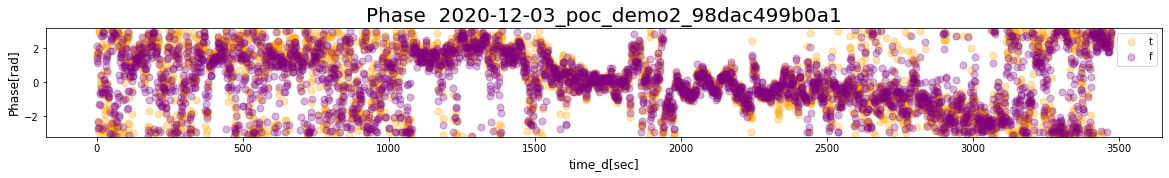

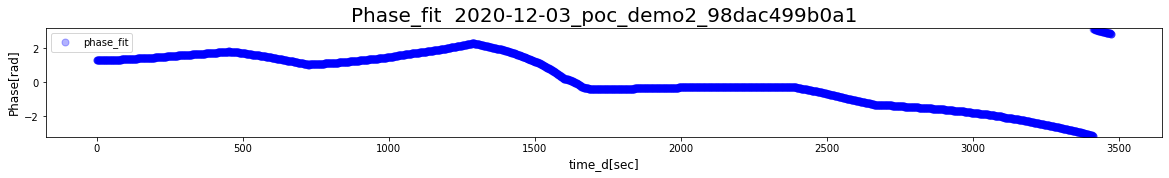

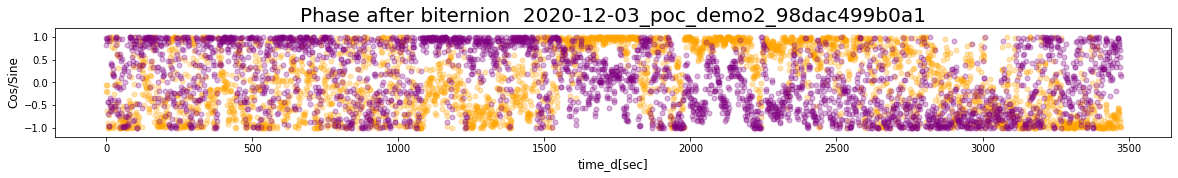

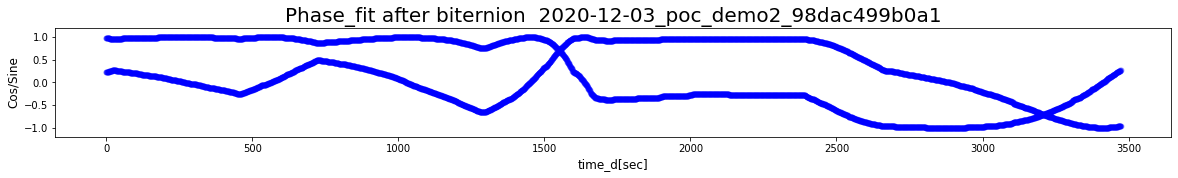

Elements in list = 1
Maximal elemenets in nested list = 3474
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3474
Number of features = 1
Elements in list = 1
Maximal elemenets in nested list = 3474
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3474
Number of features = 2
3593 2
3593 2
y.shape
(3593, 1)
x.shape
(3593, 2)
y1.shape
(3593, 2)
x1.shape
(3593, 2)


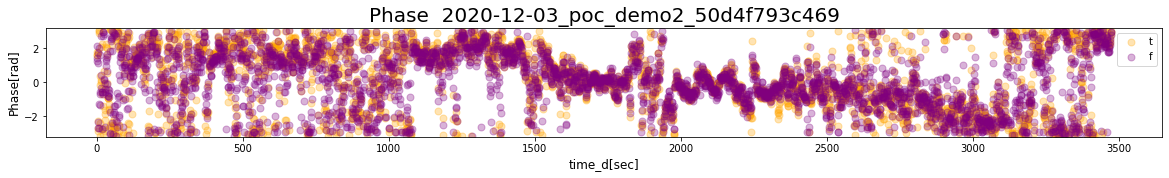

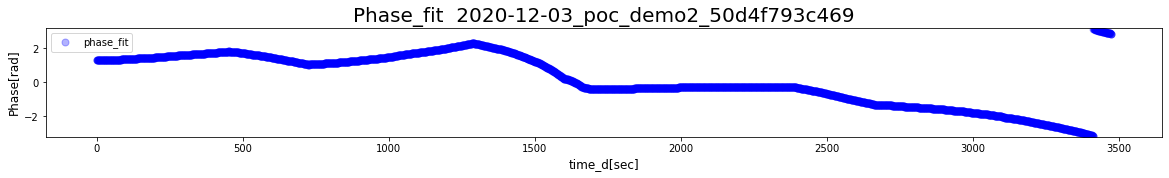

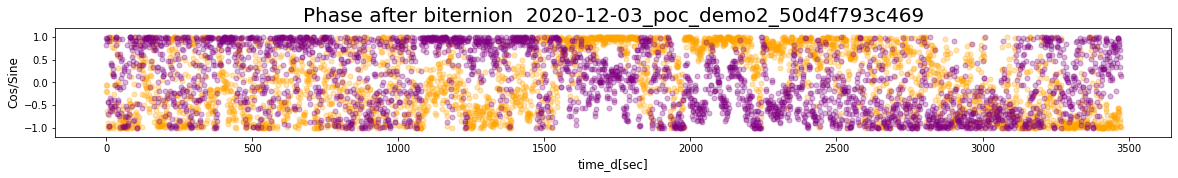

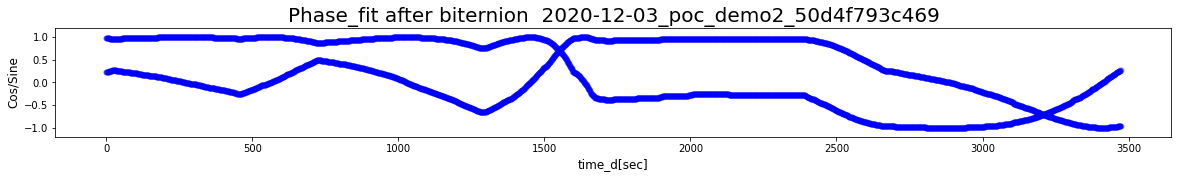

Elements in list = 2
Maximal elemenets in nested list = 3593
Number of features = 2
Elements in list = 2
Maximal elemenets in nested list = 3593
Number of features = 1
Elements in list = 2
Maximal elemenets in nested list = 3593
Number of features = 2
Elements in list = 2
Maximal elemenets in nested list = 3593
Number of features = 2
3395 2
3395 2
y.shape
(3395, 1)
x.shape
(3395, 2)
y1.shape
(3395, 2)
x1.shape
(3395, 2)


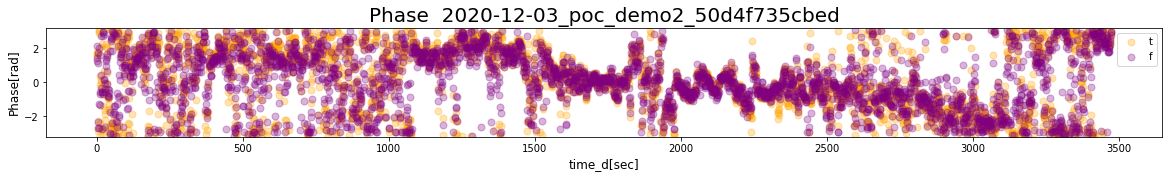

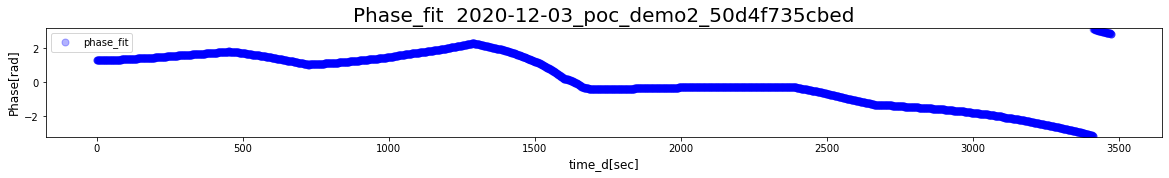

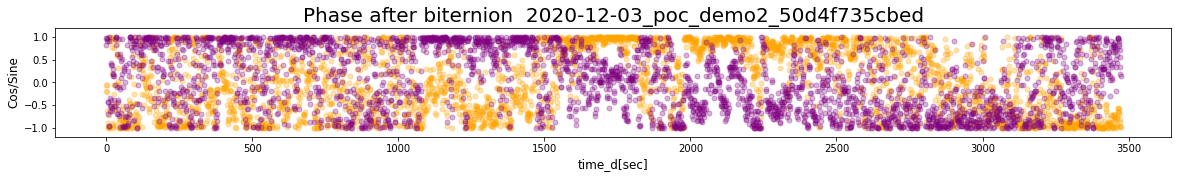

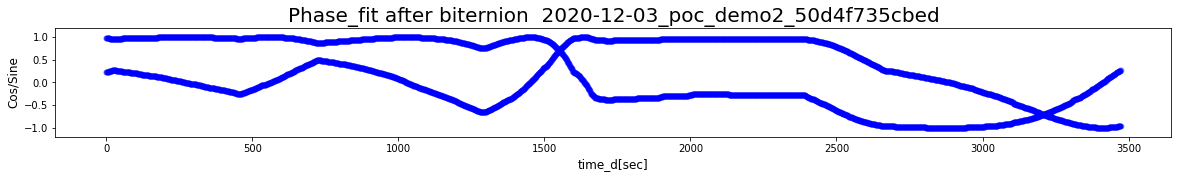

Elements in list = 3
Maximal elemenets in nested list = 3593
Number of features = 2
Elements in list = 3
Maximal elemenets in nested list = 3593
Number of features = 1
Elements in list = 3
Maximal elemenets in nested list = 3593
Number of features = 2
Elements in list = 3
Maximal elemenets in nested list = 3593
Number of features = 2


3593

In [15]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from numpy import random
import datetime
import os
from general_utils import get_paths

folders = path['temp_data'] + "/in_data1/"
print(folders)

os_path = os.listdir(folders)
def preY1(y):
    trainY = [np.cos(y[0]), np.sin(y[0])]
    trainY=np.array(trainY)
    trainY=trainY.reshape(-1, 2)
    return trainY

def preY(trainY):
    trainY=np.array([np.cos(trainY[0]),np.sin(trainY[0])])
    trainY=np.transpose(trainY)
    trainY=np.reshape(trainY,(trainY.shape[0],trainY.shape[1]))
    print(trainY.shape[0],trainY.shape[1])
    return trainY

def preX(trainX):
    trainX = np.array([np.cos(trainX[0]), np.sin(trainX[1])])
    trainX = np.transpose(trainX)
#     trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1]))
    print(trainX.shape[0], trainX.shape[1])
    return trainX

folders=[]
def random_file(n=None, replace=False):
    for f in range(len(os_path)):
        folders.append(os_path[f])
    randoms = random.choice(folders,n, replace=False)
    return randoms
randoms=random_file(n=3, replace=False)
print(randoms)


def data_prepare(n=None, replace=False,random=False, file=None, fol=None):
    dataset = pd.DataFrame()
    x_datasets = []
    y_datasets = []
    x1_datasets = []
    y1_datasets = []
    fol="/in_data1/"
    if random is True:
        randoms = random_file(n=n, replace=False)

    else:
        randoms=list([file])
        print(randoms)
        
    for f in randoms:
        dataset = pd.read_csv(path['temp_data'] + fol + f)
        dataset = dataset.dropna(how='any')
        outname = f.split('.csv')[0]
        x=[dataset['t'].values,dataset['f'].values]

        x=np.array(x)
        x1=preX(x)  
        x=np.transpose(x)
        x=x.reshape(-1, 2)
#
        y=[dataset['phase_fit'].values]
        y=np.array(y)
        y1=preY(y)
        y=y.reshape(-1, 1)
        

        print('y.shape')
        print(y.shape)
        print('x.shape')
        print(x.shape)
        print('y1.shape')
        print(y1.shape)
        print('x1.shape')
        print(x1.shape)


        x_datasets.append(x)        
        y_datasets.append(y)
        x1_datasets.append(x1)
        y1_datasets.append(y1)
        
        
        plt.figure(figsize=(20, 2))
        plt.plot(x_datasets[0][:,0],color="orange",marker='o',ms=7,linestyle = 'None',alpha=0.3)
        plt.plot(x_datasets[0][:,1],color="purple",marker='o',ms=7,linestyle = 'None',alpha=0.3)
        plt.ylim([-3.2, 3.2])
        plt.title('Phase  '+ outname, size=20)
        plt.xlabel('time_d[sec]', size=12)
        plt.ylabel('Phase[rad]', size=12)
        plt.legend(["t", "f"])
        plt.show()
        
        plt.figure(figsize=(20, 2))
        plt.plot(y_datasets[0][:,0],color="blue",marker='o',ms=7,linestyle = 'None',alpha=0.3)
        plt.title('Phase_fit  '+ outname, size=20)
        plt.xlabel('time_d[sec]', size=12)
        plt.ylabel('Phase[rad]', size=12)
        plt.legend(["phase_fit"])
        plt.ylim([-3.2, 3.2])
        plt.show()
        
        plt.figure(figsize=(20, 2))
        plt.plot(x1_datasets[0][:,0],color="orange",marker='o',ms=5,linestyle = 'None',alpha=0.3)
        plt.plot(x1_datasets[0][:,1],color="purple",marker='o',ms=5,linestyle = 'None',alpha=0.3)
        plt.ylim([-1.2, 1.2])
        plt.title('Phase after biternion  '+ outname, size=20)
        plt.xlabel('time_d[sec]', size=12)
        plt.ylabel('Cos/Sine', size=12)
        plt.show()


        plt.figure(figsize=(20, 2))
        plt.plot(y1_datasets[0][:,0],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
        plt.plot(y1_datasets[0][:,1],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
        plt.ylim([-1.2, 1.2])
        plt.title('Phase_fit after biternion  '+ outname, size=20)
        plt.xlabel('time_d[sec]', size=12)
        plt.ylabel('Cos/Sine', size=12)
        plt.show()
               
        
        trainXs,maxLength_trainXs,countlist,countfeat=build_dataset(x_datasets)
        trainXs=np.array(trainXs)

#         print(trainXs,trainXs.shape,np.isnan(trainXs).sum())
        trainXs=tf.constant(trainXs,dtype=tf.float32)

        trainYs,maxLength_trainYs,countlist,countfeat=build_dataset(y_datasets)
        trainYs=np.array(trainYs)
#         print(trainYs,np.isnan(trainYs).sum())
        trainYs=tf.constant(trainYs,dtype=tf.float32)

        trainX1s,maxLength_trainX1s,countlist,countfeat=build_dataset(x1_datasets)
        trainX1s=np.array(trainX1s)
#         print(trainX1s,trainX1s.shape,np.isnan(trainX1s).sum())
        trainX1s=tf.constant(trainX1s,dtype=tf.float32)

        trainY1s,maxLength_trainY1s,countlist,countfeat=build_dataset(y1_datasets)
        trainY1s=np.array(trainY1s)
#         print(trainY1s,trainY1s.shape,np.isnan(trainY1s).sum())
        trainY1s=tf.constant(trainY1s,dtype=tf.float32)

    return trainX1s,trainY1s,x_datasets,y_datasets,x1_datasets,y1_datasets,maxLength_trainX1s

n=3
file= '2020-12-03_poc_demo2_50d4f793c469.csv'
trainX1s,trainY1s,x_datasets,y_datasets,x1_datasets,y1_datasets,maxLength=data_prepare(n=n, replace=False,random=True, file=file)
maxLength

### Building, running and training the model

In [363]:
#Model training code: model_path-saved model, model=True/False-Model exist or not, 
#n-number of datasets to be taken for training from the in_data folder

folders=[]
def lstm_model_train(model_path,model=True, n=None):
    if model is True:
        print('create_model')
        create_model()
        model.save(model_path)
    else:
        print('Train_model')
        model = tf.keras.models.load_model(model_path)
        for i in range(5):
            create_model()
        model.save(model_path)
                  
    
def create_model(n=n):
    
    data_prepare(n=n, replace=False,random=True, file=file, fol=None)
    
    #define a set of parameters to optimize the model.
    optimizer=tf.keras.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,
        amsgrad=False,
        name='Adam'
    )
    
#     biternion = Biternion()
    normalizer = tf.keras.layers.Normalization()
    SeqInp = tf.keras.layers.Input(shape=(None,2),dtype=tf.float32)
    biLSTM1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation="tanh",
                            recurrent_activation="sigmoid",
                            dropout=0.2,
                            use_bias=True,
                            kernel_initializer="glorot_uniform",
                            recurrent_initializer="orthogonal",
                            bias_initializer="zeros", return_sequences=True, stateful=False)
                                            ,input_shape=(1,None, 2))(SeqInp)
    NormLyr1 = normalizer(biLSTM1)
    print(NormLyr1)
    biLSTM2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation="tanh",
                            recurrent_activation="sigmoid",
                            dropout=0.2,
                            use_bias=True,
                            kernel_initializer="glorot_uniform",
                            recurrent_initializer="orthogonal",
                            bias_initializer="zeros", return_sequences=True, stateful=False))(NormLyr1)

    NormLyr2 = normalizer(biLSTM2)
    FC1 = Dense(2)(NormLyr2)
    model = keras.Model(inputs=SeqInp, outputs=FC1)
    model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

    #
    regressionoutput=model.fit(trainX1s,trainY1s,
                               epochs=20,
#                                validation_split=0.1,
                               batch_size=None,
                               shuffle=True,
                               steps_per_epoch=n,
                               verbose=2)
    model.summary()
      
    rcParams['figure.figsize'] = (10, 3)
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False 

    plt.plot(
        regressionoutput.history['loss'], 
        label='Loss', lw=2

    )
    plt.title('Evaluation metrics', size=20)
    plt.xlabel('Epoch', size=12)
    plt.legend();

    return model


create_model
3395 2
3395 2
y.shape
(3395, 1)
x.shape
(3395, 2)
y1.shape
(3395, 2)
x1.shape
(3395, 2)


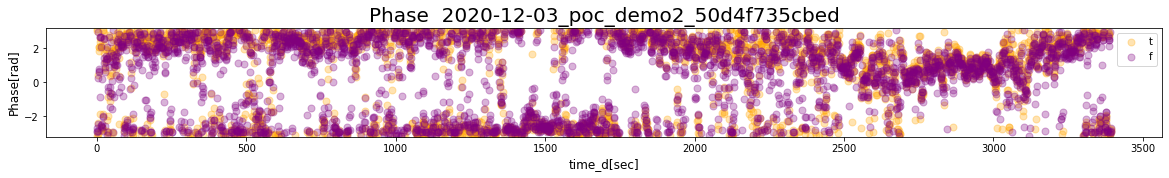

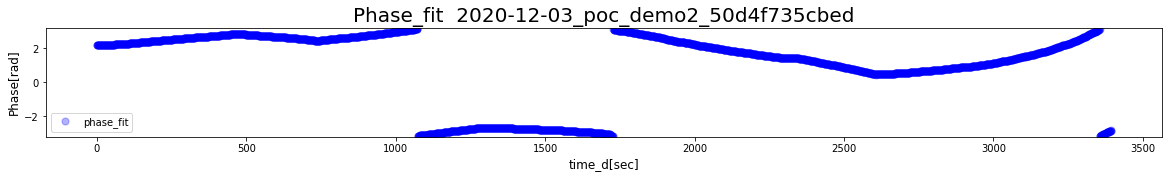

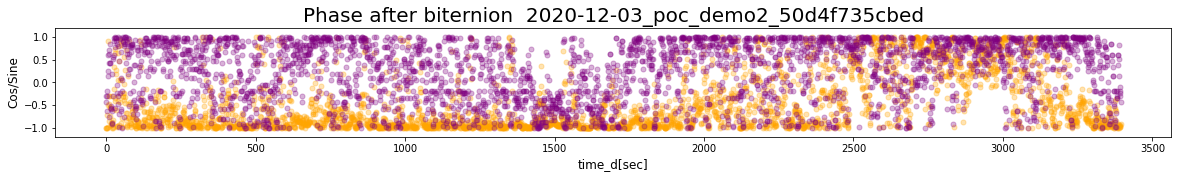

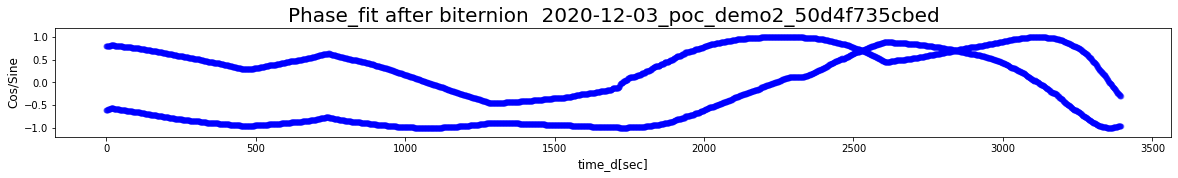

Elements in list = 1
Maximal elemenets in nested list = 3395
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3395
Number of features = 1
Elements in list = 1
Maximal elemenets in nested list = 3395
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3395
Number of features = 2
Tensor("normalization_6/truediv:0", shape=(?, ?, 400), dtype=float32)
Train on 1 samples
Epoch 1/20


In [ ]:
model_path='/home/dalit/Dalit_tests/saved_model/BiLstm_py_091122'
model=lstm_model_train(model_path,model=True, n=5)

3593 2
3593 2
y.shape
(3593, 1)
x.shape
(3593, 2)
y1.shape
(3593, 2)
x1.shape
(3593, 2)


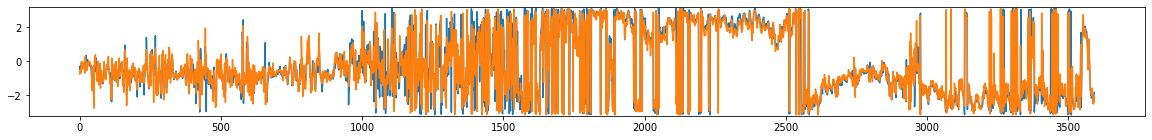

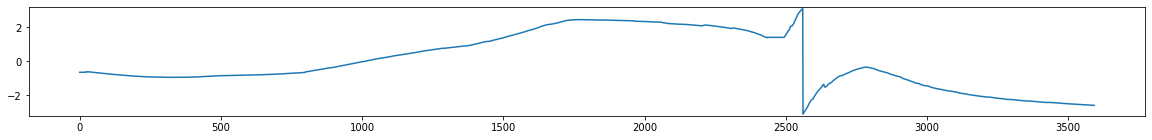

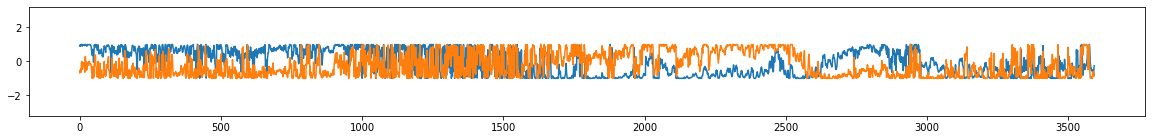

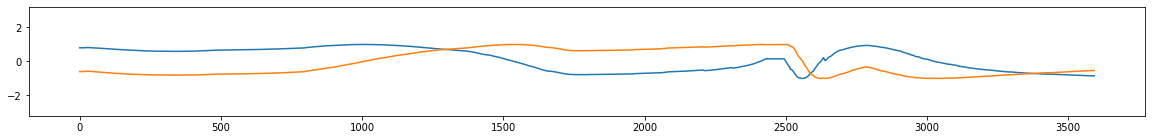

Elements in list = 1
Maximal elemenets in nested list = 3593
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3593
Number of features = 1
Elements in list = 1
Maximal elemenets in nested list = 3593
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3593
Number of features = 2
Train on 5 samples
Epoch 1/20


/home/dalit/.local/lib/python3.8/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-11-08 17:12:12.241779: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-11-08 17:12:12.241817: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-11-08 17:12:18.009635: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-08 17:12:20.244639: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-11-08 17:12:24.000362: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221108-171201/plugins/profile/2022_11_08_17_12_20

2022-11-08 17:12:25.925806: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped 

5/5 - 40s - loss: 0.3422 - mean_absolute_error: 0.5083 - 40s/epoch - 8s/step
Epoch 2/20
5/5 - 28s - loss: 0.1742 - mean_absolute_error: 0.3292 - 28s/epoch - 6s/step
Epoch 3/20
5/5 - 26s - loss: 0.1831 - mean_absolute_error: 0.3506 - 26s/epoch - 5s/step
Epoch 4/20
5/5 - 26s - loss: 0.2013 - mean_absolute_error: 0.3543 - 26s/epoch - 5s/step
Epoch 5/20
5/5 - 25s - loss: 0.1610 - mean_absolute_error: 0.3112 - 25s/epoch - 5s/step
Epoch 6/20
5/5 - 25s - loss: 0.1615 - mean_absolute_error: 0.3112 - 25s/epoch - 5s/step
Epoch 7/20
5/5 - 25s - loss: 0.1968 - mean_absolute_error: 0.3574 - 25s/epoch - 5s/step
Epoch 8/20
5/5 - 25s - loss: 0.1762 - mean_absolute_error: 0.3366 - 25s/epoch - 5s/step
Epoch 9/20
5/5 - 26s - loss: 0.2021 - mean_absolute_error: 0.3626 - 26s/epoch - 5s/step
Epoch 10/20
5/5 - 26s - loss: 0.1328 - mean_absolute_error: 0.2861 - 26s/epoch - 5s/step
Epoch 11/20
5/5 - 27s - loss: 0.1263 - mean_absolute_error: 0.2792 - 27s/epoch - 5s/step
Epoch 12/20
5/5 - 26s - loss: 0.1923 - me

In [265]:
import datetime

model_path='/home/dalit/Dalit_tests/saved_model/BiLstm_py_091122'
model = tf.keras.models.load_model(model_path)
n=5
trainX1s,trainY1s,x_datasets,y_datasets,x1_datasets,y1_datasets,maxLength=data_prepare(n=1, 
                                                                                       replace=False,
                                                                                       random=True,
                                                                                       file=file,
                                                                                       fol=None)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

checkpoint_filepath = '/home/dalit/Dalit_tests/bi_LSTM0811checkpoint'

#define a set of parameters to optimize the model.
optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name='Adam'
)


normalizer = tf.keras.layers.Normalization()
SeqInp = tf.keras.layers.Input(shape=(None,2),dtype=tf.float32)
biLSTM1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation="tanh",
                        recurrent_activation="sigmoid",
                        dropout=0.2,
                        use_bias=True,
                        kernel_initializer="glorot_uniform",
                        recurrent_initializer="orthogonal",
                        bias_initializer="zeros", return_sequences=True, stateful=False)
                                        ,input_shape=(1,None, 2))(SeqInp)
NormLyr1 = normalizer(biLSTM1)
biLSTM2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(200, activation="tanh",
                        recurrent_activation="sigmoid",
                        dropout=0.2,
                        use_bias=True,
                        kernel_initializer="glorot_uniform",
                        recurrent_initializer="orthogonal",
                        bias_initializer="zeros", return_sequences=True, stateful=False))(NormLyr1)

NormLyr2 = normalizer(biLSTM2)
FC1 = Dense(2)(NormLyr2)
model = keras.Model(inputs=SeqInp, outputs=FC1)
model.compile(optimizer=optimizer, loss="mean_squared_error", metrics=["mae"])

#
regressionoutput=model.fit(trainX1s,trainY1s,
                           epochs=20,
#                                validation_split=0.1,
                           batch_size=None,
                           shuffle=True,
                           steps_per_epoch=n,
                           verbose=2,callbacks=[tensorboard_callback])
model.summary()

# print("Evaluate")
# file= '2020-12-03_poc_demo2_50d4f793c469.csv'
# test_dataset = pd.read_csv(path['temp_data'] + "/in_data1/" + file)
# result = model.evaluate(test_dataset)
# dict(zip(model.metrics_names, result))
#     rcParams['figure.figsize'] = (10, 3)
#     rcParams['axes.spines.top'] = False
#     rcParams['axes.spines.right'] = False 

#     plt.plot(
#         regressionoutput.history['loss'], 
#         label='Loss', lw=2

#     )
#     plt.title('Evaluation metrics', size=20)
#     plt.xlabel('Epoch', size=12)
#     plt.legend();



7871 2
7871 2
y.shape
(7871, 1)
x.shape
(7871, 2)
y1.shape
(7871, 2)
x1.shape
(7871, 2)


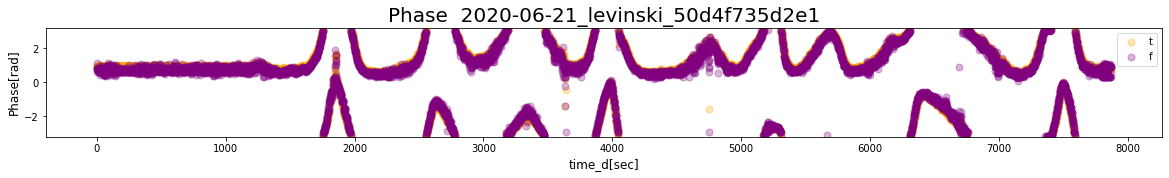

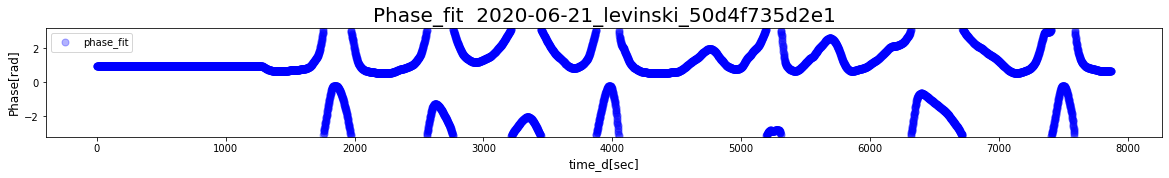

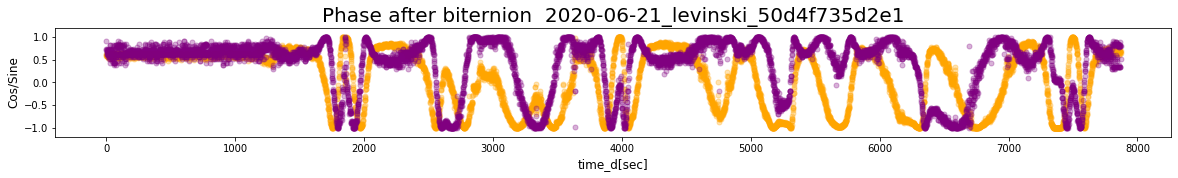

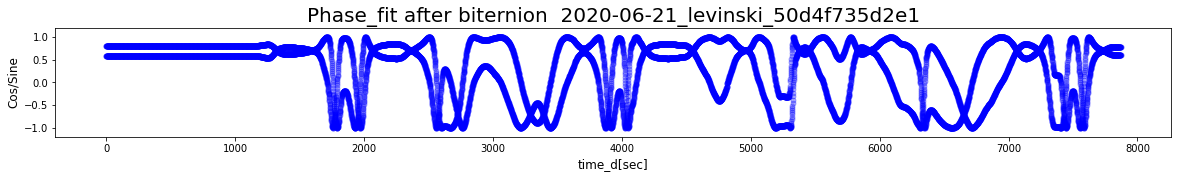

Elements in list = 1
Maximal elemenets in nested list = 7871
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 7871
Number of features = 1
Elements in list = 1
Maximal elemenets in nested list = 7871
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 7871
Number of features = 2
Train on 5 samples
Epoch 1/5


/home/dalit/.local/lib/python3.8/site-packages/keras/engine/training_v1.py:2045: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates
2022-11-09 20:26:05.770818: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-11-09 20:26:05.770991: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-11-09 20:26:18.948401: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-09 20:26:23.778493: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-11-09 20:26:29.033011: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221109-202540/plugins/profile/2022_11_09_20_26_23

2022-11-09 20:26:31.882244: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped 

5/5 - 80s - loss: 0.2494 - mae: 0.4124 - 80s/epoch - 16s/step
Epoch 2/5
5/5 - 60s - loss: 0.0957 - mae: 0.2345 - 60s/epoch - 12s/step
Epoch 3/5
5/5 - 59s - loss: 0.1643 - mae: 0.3228 - 59s/epoch - 12s/step
Epoch 4/5
5/5 - 59s - loss: 0.0793 - mae: 0.2252 - 59s/epoch - 12s/step
Epoch 5/5
5/5 - 56s - loss: 0.0601 - mae: 0.2053 - 56s/epoch - 11s/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 2)]    0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, None, 400)    324800      ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, No

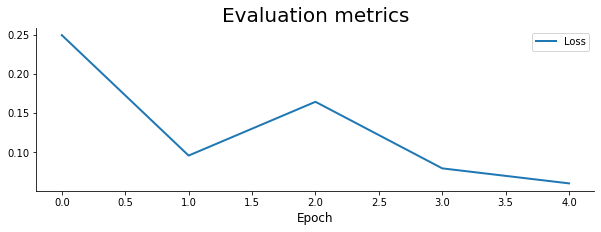

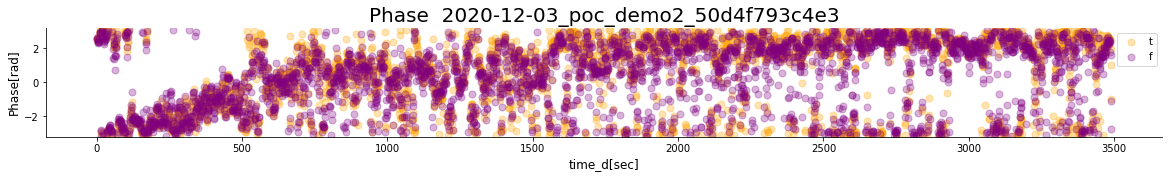

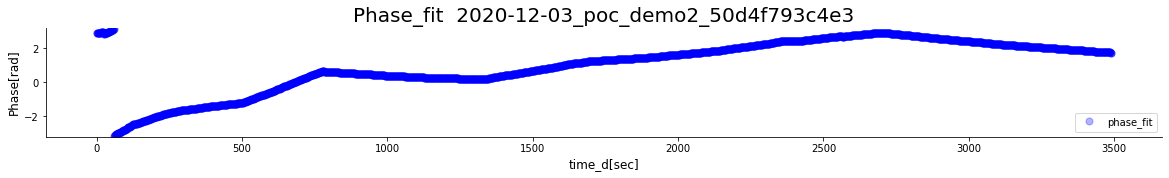

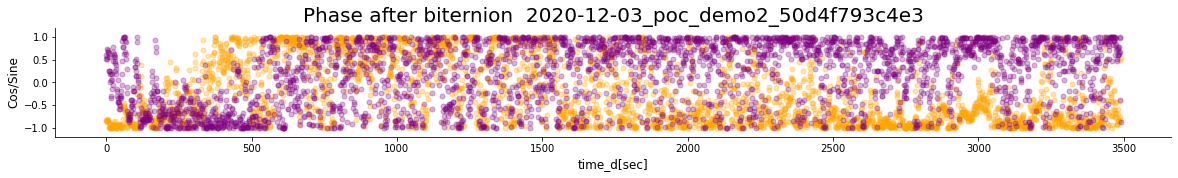

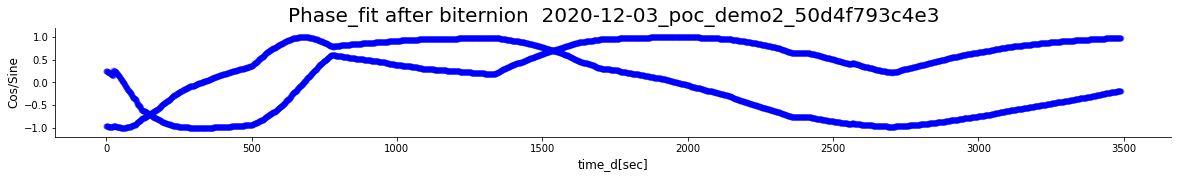

Elements in list = 1
Maximal elemenets in nested list = 3491
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3491
Number of features = 1
Elements in list = 1
Maximal elemenets in nested list = 3491
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3491
Number of features = 2
Train on 5 samples
Epoch 1/5


2022-11-09 20:31:20.422993: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-11-09 20:31:20.423120: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-11-09 20:31:28.175651: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-11-09 20:31:30.618301: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-11-09 20:31:32.779110: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221109-203106/plugins/profile/2022_11_09_20_31_30

2022-11-09 20:31:35.025906: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/fit/20221109-203106/plugins/profile/2022_11_09_20_31_30/dalit-Inspiron-15-3511.trace.json.gz
2022-11-09 20:31:36.708169: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/fit/20221109-203106/plugins/profile

5/5 - 41s - loss: 0.2414 - mae: 0.3913 - 41s/epoch - 8s/step
Epoch 2/5
5/5 - 26s - loss: 0.2415 - mae: 0.4000 - 26s/epoch - 5s/step
Epoch 3/5
5/5 - 25s - loss: 0.2087 - mae: 0.3701 - 25s/epoch - 5s/step
Epoch 4/5
5/5 - 26s - loss: 0.1927 - mae: 0.3584 - 26s/epoch - 5s/step
Epoch 5/5
5/5 - 29s - loss: 0.2283 - mae: 0.3817 - 29s/epoch - 6s/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 2)]    0           []                               
                                                                                                  
 bidirectional (Bidirectional)  (None, None, 400)    324800      ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, None, 4

IsADirectoryError: [Errno 21] Unable to create file (unable to open file: name = '/home/dalit/Dalit_tests/saved_model/BiLstm_py_091122', errno = 21, error message = 'Is a directory', flags = 13, o_flags = 242)

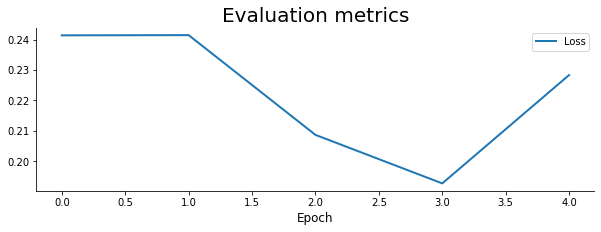

In [35]:
import datetime

model_path='saved_model/BiLstm_py_091122'
model = tf.keras.models.load_model(model_path)
n=5
for i in range(1):
    trainX1s,trainY1s,x_datasets,y_datasets,x1_datasets,y1_datasets,maxLength=data_prepare(n=1, 
                                                                                           replace=False,
                                                                                           random=True,
                                                                                           file=file,
                                                                                           fol=None)

    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    checkpoint_filepath = '/home/dalit/Dalit_tests/bi_LSTM0811checkpoint'


    #
    regressionoutput=model.fit(trainX1s,trainY1s,
                               epochs=5,
    #                                validation_split=0.1,
                               batch_size=None,
                               shuffle=True,
                               steps_per_epoch=n,
                               verbose=2,callbacks=[tensorboard_callback])
    model.summary()
    
    print("Evaluate")
    file= '2020-12-03_poc_demo2_50d4f793c469.csv'
    test_dataset = pd.read_csv(path['temp_data'] + "/in_data1/" + file)
    result = model.evaluate(x=trainX1s,
        y=trainY1s,
        batch_size=None,
        verbose='auto',
        sample_weight=None,
        steps=1,

    )


    dict(zip(model.metrics_names, result))

    rcParams['figure.figsize'] = (10, 3)
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False 

    plt.plot(
        regressionoutput.history['loss'], 
        label='Loss', lw=2

    )
    plt.title('Evaluation metrics', size=20)
    plt.xlabel('Epoch', size=12)
    plt.legend();
model.save(model_path)

In [267]:
model.save(model_path)

## Model visualization

In [ ]:
%tensorboard --logdir logs

In [16]:
# %tensorboard --logdir logs/fit

### Model prediction

3501 2
3501 2
y.shape
(3501, 1)
x.shape
(3501, 2)
y1.shape
(3501, 2)
x1.shape
(3501, 2)


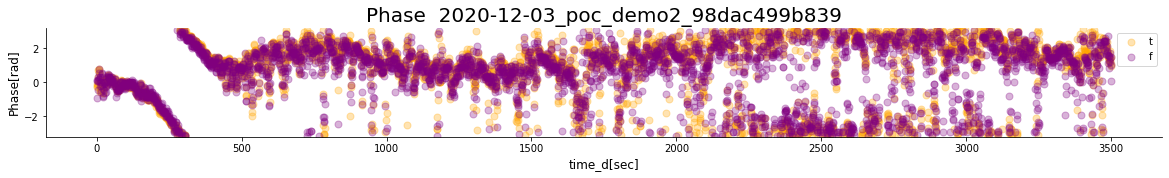

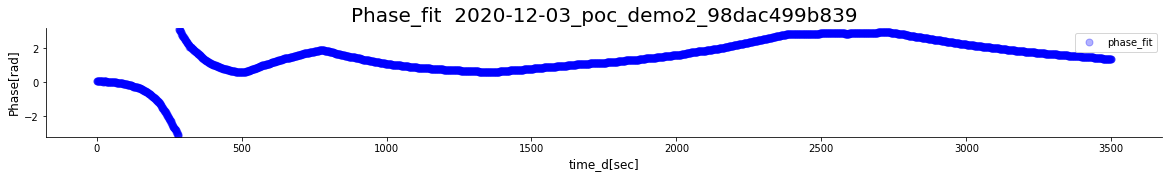

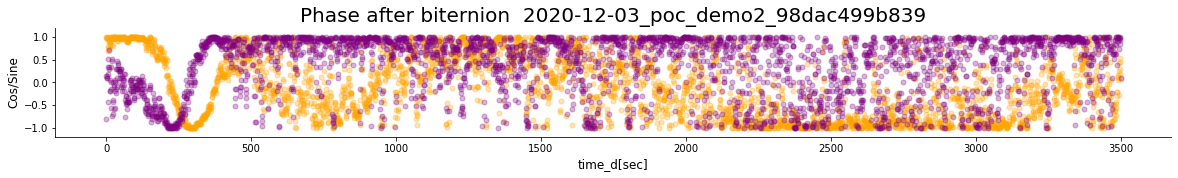

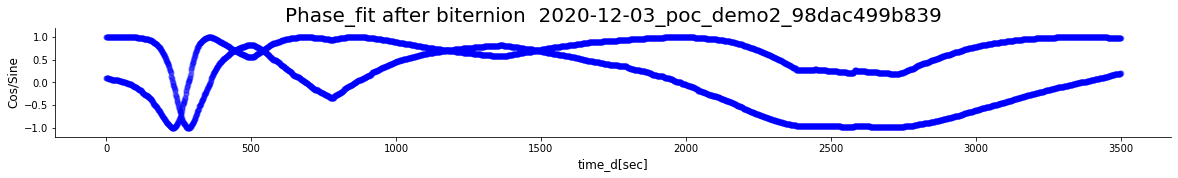

Elements in list = 1
Maximal elemenets in nested list = 3501
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3501
Number of features = 1
Elements in list = 1
Maximal elemenets in nested list = 3501
Number of features = 2
Elements in list = 1
Maximal elemenets in nested list = 3501
Number of features = 2


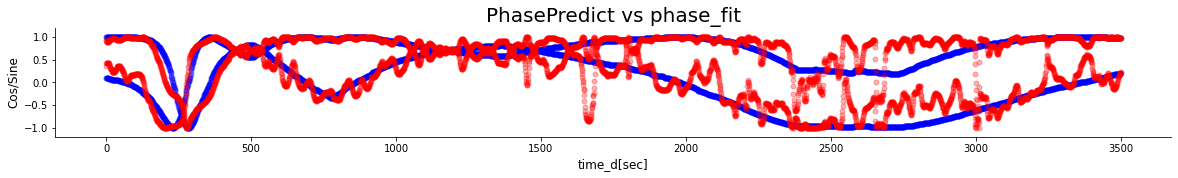

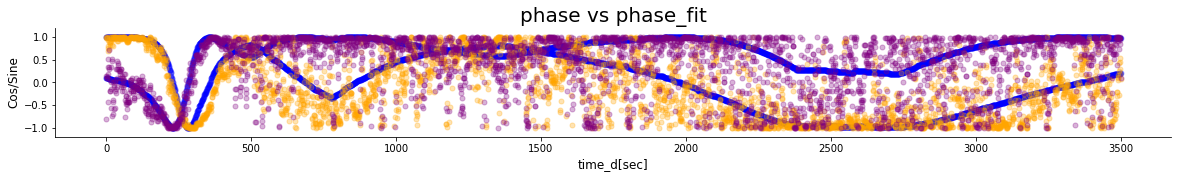

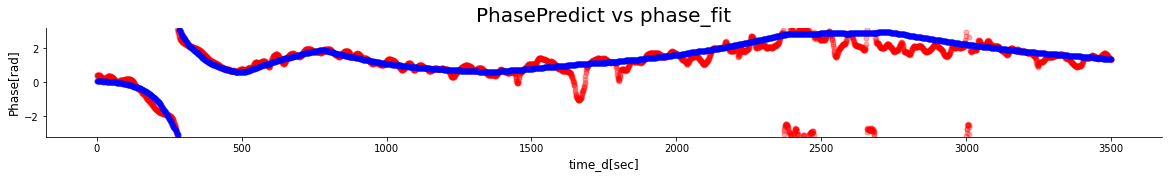

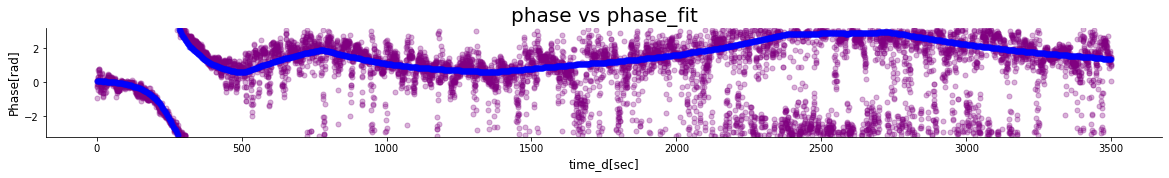

Train Score: 1.06 RMSE
PreTrain Score: 1.88 RMSE


In [43]:
n=1
folds="/in_data2/"
trainX1s,trainY1s,x_datasets,y_datasets,x1_datasets,y1_datasets,maxLength=data_prepare(n=n,
                                                                                       replace=False,
                                                                                       random=True,
                                                                                       file=file,
                                                                                       fol=folds)
trainPredict = model.predict(
    trainX1s,
    batch_size=1,
    steps=1,
    verbose=1,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False
)

tnp.asarray(trainPredict)

# trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1]))

predict_phase=[]
for i in range(0, len(trainPredict[0])):
#     print(trainPredict[0, i, 1])
    s = np.sqrt(pow(trainPredict[0, i, 0], 2) + pow(trainPredict[0, i, 1], 2))
# print(s.shape)
    trainPredict[0, i, :] = trainPredict[0, i, :] / s
    predict = np.arctan2(trainPredict[0, i, 1], trainPredict[0, i, 0])
    predict_phase.append(predict)
    


plt.figure(figsize=(20, 2))
plt.plot(y1_datasets[0][:,0],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(y1_datasets[0][:,1],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(trainPredict[0][:,0],color="r",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(trainPredict[0][:,1],color="r",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.ylim([-1.2, 1.2])
plt.title('PhasePredict vs phase_fit' , size=20)
plt.xlabel('time_d[sec]', size=12)
plt.ylabel('Cos/Sine', size=12)
# plt.legend(["trainPredict", "trainPredict"])
plt.show()
# plt.figure(figsize=(20, 2))
# plt.plot(y1_datasets[0])
# plt.ylim([-1.2, 1.2])
# # plt.figure(figsize=(20, 2))
# plt.plot(trainPredict[0])
# plt.ylim([-1.2, 1.2])
# plt.show()
plt.figure(figsize=(20, 2))
plt.plot(y1_datasets[0][:,0],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(y1_datasets[0][:,1],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(x1_datasets[0][:,0],color="orange",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(x1_datasets[0][:,1],color="purple",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.ylim([-1.2, 1.2])
plt.title('phase vs phase_fit' , size=20)
plt.xlabel('time_d[sec]', size=12)
plt.ylabel('Cos/Sine', size=12)
# plt.legend(["trainPredict", "trainPredict"])
plt.show()

plt.figure(figsize=(20, 2))
plt.plot(predict_phase,color="r",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(y_datasets[0],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.xlabel('time_d[sec]', size=12)
plt.ylabel('Phase[rad]', size=12)
plt.title('PhasePredict vs phase_fit', size=20)
plt.ylim([-3.2, 3.2])
plt.show()

plt.figure(figsize=(20, 2))
plt.plot(x_datasets[0],color="purple",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.plot(y_datasets[0],color="blue",marker='o',ms=5,linestyle = 'None',alpha=0.3)
plt.xlabel('time_d[sec]', size=12)
plt.ylabel('Phase[rad]', size=12)
plt.title('phase vs phase_fit', size=20)
plt.ylim([-3.2, 3.2])
plt.show()


# error
TrainScore = math.sqrt(mean_squared_error(y_datasets[0], predict_phase))
print('Train Score: %.2f RMSE' % (TrainScore))
# print('Train Score: %.2f RMSE' % (TrainScore))
PreTrainScore = math.sqrt(mean_squared_error(y_datasets[0], x_datasets[0][:,0]))
print('PreTrain Score: %.2f RMSE' % (PreTrainScore))

